# MCDA5511 Assignment 3 : Transformers

Submitted By:
- Louise Fear - A00410480
- Mohammed Abdul Thoufiq - A00487041
- Sudeep Raj Badal - A00431008
- Sukanta Dey Amit - A00483108

# Part 1: Logistic Regression & Neural Network from Scratch

### Necessary Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from tabulate import tabulate

#### Data Source

The data for Part 1 of the assignment was obtained from a cardiovascular health dataset. It contains 70,000 records of patients with features such as age, gender, height, weight, blood pressure, cholesterol levels, glucose levels, smoking habits, alcohol consumption, and physical activity. The target variable, cardio, is binary (0 or 1), indicating whether a patient has cardiovascular disease.

The dataset is clean and well-structured, consisting of only numerical features, requiring minimal preprocessing. The data also comes with all categorical columns already encoded. Given that the target variable is binary, this is a perfect dataset for binary classification problem.

Kaggle Link: https://www.kaggle.com/datasets/akshatshaw7/cardiovascular-disease-dataset

### Load Data

In [3]:
df = pd.read_csv("health_data.csv")
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


### Dataset Overview
We use a cardiovascular disease dataset for the binary classification task. The goal is to predict whether a person has a cardiovascular disease by looking at various vitals of the body and other details about the person

#### Labels:
- **cardio (target):** `1 = Presence of Cardiovascular disease` and `0 = Absence of Cardiovascular disease`

### Features  

There are two types of features being considered for the loan status.

#### **Numeric Features**  
- `age`: Age of the person in days
- `height`: Height of the person in cm
- `weight`: Weight of the person in Kg
- `ap_hi`: Systolic Blood Pressure of the person
- `ap_lo`: Diastolic Blood Pressure of the person

#### **Encoded Categorical Features**  
- `gender`: Gender of the person encoded into 0 and 1 (meaning of the category not included in the original dataset)  
- `cholesterol`: Level of Blood Cholesterol |  1: normal, 2: above normal, 3: well above normal
- `gluc`: Level of Blood Glucose | 1: normal, 2: above normal, 3: well above normal
- `smoke`: Whether the person smokes or not | 1: Smokes, 2: Does not smoke
- `alco`: Whether the person drinks alcohol or not | 1: Drinks, 2: Does not drink
- `active`: Whether the person is physically active or not | 1: Physicall active, 2: Not physically active


#### Basic Info

In [4]:
print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Shape of Dataset (Rows, Columns):", df.shape)


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB
None

🔹 Shape of Dataset (Rows, Columns): (70000, 14)


#### Summary of Data

In [5]:
# Summary of numerical features
print("\nSummary Statistics for Numeric Features:")
df.describe()


Summary Statistics for Numeric Features:


,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#### Missing Values

In [6]:
# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Duplicate Values

In [7]:
duplicate_count = df.duplicated().sum()
print(f"\n🔹 Number of Duplicate Rows: {duplicate_count}")


🔹 Number of Duplicate Rows: 0


#### Distribution of Target Class 

Checking the ratio of loans rejected vs loans approved

cardio
0    35021
1    34979
Name: count, dtype: int64

Class Distribution (Percentage):


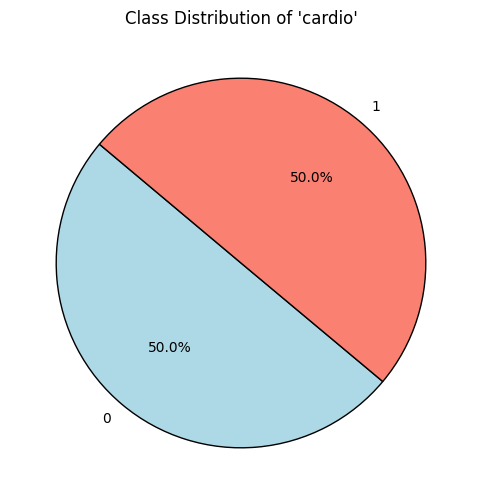

In [8]:
print(df["cardio"].value_counts())  # Count occurrences of each class
print("\nClass Distribution (Percentage):")

# Plot Pie Chart
class_counts = df["cardio"].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", 
        colors=["lightblue", "salmon"], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Class Distribution of 'cardio'")
plt.show()

Looking at the distribution of the target class, the dataset is balanced and we don't have any class imbalance issues

#### Overview of Outliers

In [146]:
# Define threshold
threshold = 3

# Function to count outliers using Z-score and find max values
def detect_outliers_zscore(df, threshold=3):
    outlier_info = []
    for col in df.select_dtypes(include=['number']).columns:
        z_scores = np.abs(stats.zscore(df[col]))  # Compute Z-scores
        outliers_count = (z_scores > threshold).sum()  # Count outliers
        max_value = df[col].max()  # Get max value
        outlier_info.append([col, outliers_count, max_value])
    
    return outlier_info

# Get outlier counts and max values
outlier_info = detect_outliers_zscore(df, threshold=3)

# Convert to DataFrame
outlier_counts_df = pd.DataFrame(outlier_info, columns=["Feature", "Outliers", "Max Value"])
outlier_counts_df.set_index("Feature", inplace=True)

# Display the result in a neat table format
print("\n🔹 Outlier Counts & Max Values (Using Z-score Method, Threshold = 3):")
print(tabulate(outlier_counts_df, headers='keys', tablefmt='pretty'))



🔹 Outlier Counts & Max Values (Using Z-score Method, Threshold = 3):
+-------------+----------+-----------+
|   Feature   | Outliers | Max Value |
+-------------+----------+-----------+
|    index    |   0.0    |  69999.0  |
|     id      |   0.0    |  99999.0  |
|     age     |   4.0    |  23713.0  |
|   gender    |   0.0    |    1.0    |
|   height    |  293.0   |   250.0   |
|   weight    |  702.0   |   200.0   |
|    ap_hi    |   38.0   |  16020.0  |
|    ap_lo    |  951.0   |  11000.0  |
| cholesterol |   0.0    |    2.0    |
|    gluc     |  5331.0  |    2.0    |
|    smoke    |  6169.0  |    1.0    |
|    alco     |  3764.0  |    1.0    |
|   active    |   0.0    |    1.0    |
|   cardio    |   0.0    |    1.0    |
+-------------+----------+-----------+


#### Check for invalid data counts

Check for any impossible human vitals as max value as seen above specially in `ap_hi` and `ap_lo` is not possible in humans.

In [147]:
# Count invalid systolic and diastolic blood pressure values
invalid_ap_hi = ((df["ap_hi"] <= 60) | (df["ap_hi"] >= 200)).sum()
invalid_ap_lo = ((df["ap_lo"] <= 30) | (df["ap_lo"] >= 150)).sum()

print(f"🔹 Invalid systolic BP values (ap_hi): {invalid_ap_hi}")
print(f"🔹 Invalid diastolic BP values (ap_lo): {invalid_ap_lo}")

🔹 Invalid systolic BP values (ap_hi): 400
🔹 Invalid diastolic BP values (ap_lo): 1042


We have some unrealistic blood pressure data in the dataset which is not possible in live humans. So those datasets must be mistake
We will need to drop rows with blood pressures which are:

- Systolic pressure higher than 200
- Systolic pressure lower than 60
- Diastolic pressure higher than 150
- Diastolic pressure lower than 30

## Data Preprocessing
We Handle missing values, encode categorical features and standardize numeric features.

Operations performed:
- Drop Missing Values: Doesn't have effect in this case
- Drop index and id columns as they don't have any role in presence of cardio diseases
- Drop unrealistic blood pressure values that are not possible in living humans
- select features and target into the variables X and y
- Normalize the Dataset

No Encoding Required as all the data is numeric and all categorical variables already encoded in the original dataset.

In [148]:
# Handle missing values (impute or drop)
df = df.dropna() 

# Drop Index column and ID column as they are redundant and has no effect on presence of cardio disease
df = df.drop(columns=["index", "id"], axis=1)

# Select features and target
X = df.drop(columns=["cardio"])
y = df["cardio"]

# Remove rows with invalid blood pressure values
df = df[(df["ap_hi"] > 60) & (df["ap_hi"] < 200)]  # Keep only valid systolic BP values
df = df[(df["ap_lo"] > 30) & (df["ap_lo"] < 150)]  # Keep only valid diastolic BP values

# Confirm removal
print(f"✅ Remaining rows after removal: {df.shape[0]}")

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


✅ Remaining rows after removal: 68602


In [149]:
# Check columns after dropping
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


## Train-Test Split

We split the data into **80% training** and **20% test** sets using 'train_test_split'.

In [150]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model
We fit a logistic regression model using 'sklearn' and evaluate test set accuracy.

In [151]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

Logistic Regression Accuracy: 0.7236


## Neural Network Implementation

We implement a single-layer neural network with:

#### 1. Sigmoid Activation: The sigmoid function squashes the output between 0 and 1, ideal for binary classification.
- Formula: 
  $\sigma(z) = \frac{1}{1 + e^{-z}}$

---

#### 2. Random Weight Initialization
Weights are initialized randomly to break symmetry and allow learning of distinct features.

---

#### 3. Forward Propagation
Compute the predicted output $ \hat{y} $ from input features $ x $, weights $ w $, and bias $ b $.
- Formula: 
  $z = w \cdot x + b$

  $\hat{y} = \sigma(z)$

---

#### 4. Binary Cross-Entropy Loss
Measures the difference between the predicted output \( \hat{y} \) and the actual label \( y \).
- Formula: 
  
  $\text{Loss}(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]$
  

---

#### 5. Backward Propagation
Compute gradients of the loss with respect to weights and bias.
- Gradient for weight: $\frac{\partial \text{Loss}}{\partial w} = (\hat{y} - y) \cdot \sigma'(z) \cdot x$

- Gradient for bias: $\frac{\partial \text{Loss}}{\partial b} = (\hat{y} - y) \cdot \sigma'(z)$
  
  where $ \sigma'(z) = \hat{y}(1 - \hat{y}) $ is the derivative of the `Sigmoid Function`.

---

#### 6. Gradient Descent Updates
Update weights and bias using gradients.
- Weight update: $w = w - \eta \frac{\partial \text{Loss}}{\partial w}$
  
- Bias update: $b = b - \eta \frac{\partial \text{Loss}}{\partial b}$
  
  where $ \eta $ is the learning rate.

---


### Neural Network Code

In [152]:
class NeuralNetwork:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        # Initialization of NN
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.randn(input_size, 1) * 0.01    # Generate random weights
        self.bias = np.zeros((1,))

    def sigmoid(self, z):
        # Sigmoid Activation Function
        return 1/(1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        # Derivative of Sigmoid Activation Function
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    def forward(self, X):
        #Forward Propagation to compute Predictions
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def backward(self, X, y, y_pred):
        # Backpropagation to compute gradients
        n = X.shape[0]      # Size of the training data
        dz = y_pred - y.values.reshape(-1,1)    # Gradient for loss
        dw = np.dot(X.T, dz) / n                # Gradient for weight
        db = np.sum(dz) / n                     # Gradient for bias
        return dw, db
    
    def train(self, X, y):
        # Train the neural network using gradient descent
        for epoch in range(self.epochs):
            # Compute prediction from forward propagation
            y_pred = self.forward(X)

            # Get gradients from backpropagation
            dw, db = self.backward(X, y, y_pred)

            # Update weights and bias using gradients
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print loss every 100 epochs
            # Loss calculated by Binary Cross 
            if epoch % 100 == 0:
                loss = -np.mean(y.values.reshape(-1, 1) * np.log(y_pred + 1e-8) + (1 - y.values.reshape(-1, 1)) * np.log(1 - y_pred + 1e-8))
                print(f"Epoch: {epoch}, Loss: {loss:.4f}")
    
    def predict(self, X):
        # Predict using trained weights
        return (self.forward(X) >= 0.5).astype(int) 

## Training Neural Network for Different Epochs
We train the neural network with increasing epochs from 1000 to 2000

### Training the model With 1000 epochs:

In [153]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=1000)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6941
Epoch: 100, Loss: 0.6659
Epoch: 200, Loss: 0.6512
Epoch: 300, Loss: 0.6430
Epoch: 400, Loss: 0.6381
Epoch: 500, Loss: 0.6350
Epoch: 600, Loss: 0.6330
Epoch: 700, Loss: 0.6316
Epoch: 800, Loss: 0.6306
Epoch: 900, Loss: 0.6298


In [154]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.6563


### Training the model With 1,200 epochs:

In [155]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=1200)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6921
Epoch: 100, Loss: 0.6645
Epoch: 200, Loss: 0.6502
Epoch: 300, Loss: 0.6423
Epoch: 400, Loss: 0.6376
Epoch: 500, Loss: 0.6347
Epoch: 600, Loss: 0.6327
Epoch: 700, Loss: 0.6314
Epoch: 800, Loss: 0.6304
Epoch: 900, Loss: 0.6296
Epoch: 1000, Loss: 0.6291
Epoch: 1100, Loss: 0.6286


In [156]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.6574


### Training the model With 1,400 epochs

In [157]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=1400)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6907
Epoch: 100, Loss: 0.6642
Epoch: 200, Loss: 0.6503
Epoch: 300, Loss: 0.6425
Epoch: 400, Loss: 0.6378
Epoch: 500, Loss: 0.6349
Epoch: 600, Loss: 0.6329
Epoch: 700, Loss: 0.6315
Epoch: 800, Loss: 0.6305
Epoch: 900, Loss: 0.6297
Epoch: 1000, Loss: 0.6291
Epoch: 1100, Loss: 0.6286
Epoch: 1200, Loss: 0.6282
Epoch: 1300, Loss: 0.6279


In [158]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.6578


### Training the model with 1,600 epochs

In [159]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=1600)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6960
Epoch: 100, Loss: 0.6666
Epoch: 200, Loss: 0.6514
Epoch: 300, Loss: 0.6430
Epoch: 400, Loss: 0.6381
Epoch: 500, Loss: 0.6350
Epoch: 600, Loss: 0.6329
Epoch: 700, Loss: 0.6315
Epoch: 800, Loss: 0.6305
Epoch: 900, Loss: 0.6297
Epoch: 1000, Loss: 0.6291
Epoch: 1100, Loss: 0.6286
Epoch: 1200, Loss: 0.6282
Epoch: 1300, Loss: 0.6278
Epoch: 1400, Loss: 0.6275
Epoch: 1500, Loss: 0.6272


In [160]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.6588


### Training the model With 1,800 epochs:

In [161]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=1800)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6901
Epoch: 100, Loss: 0.6637
Epoch: 200, Loss: 0.6499
Epoch: 300, Loss: 0.6422
Epoch: 400, Loss: 0.6376
Epoch: 500, Loss: 0.6347
Epoch: 600, Loss: 0.6328
Epoch: 700, Loss: 0.6314
Epoch: 800, Loss: 0.6304
Epoch: 900, Loss: 0.6297
Epoch: 1000, Loss: 0.6291
Epoch: 1100, Loss: 0.6286
Epoch: 1200, Loss: 0.6282
Epoch: 1300, Loss: 0.6279
Epoch: 1400, Loss: 0.6275
Epoch: 1500, Loss: 0.6272
Epoch: 1600, Loss: 0.6269
Epoch: 1700, Loss: 0.6267


In [162]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.6593


### Training the model With 2,000 epochs:

In [163]:
nn = NeuralNetwork(input_size=X_train.shape[1], learning_rate=0.01, epochs=2000)
nn.train(X_train, y_train)

Epoch: 0, Loss: 0.6921
Epoch: 100, Loss: 0.6651
Epoch: 200, Loss: 0.6508
Epoch: 300, Loss: 0.6428
Epoch: 400, Loss: 0.6381
Epoch: 500, Loss: 0.6350
Epoch: 600, Loss: 0.6330
Epoch: 700, Loss: 0.6316
Epoch: 800, Loss: 0.6306
Epoch: 900, Loss: 0.6298
Epoch: 1000, Loss: 0.6292
Epoch: 1100, Loss: 0.6287
Epoch: 1200, Loss: 0.6283
Epoch: 1300, Loss: 0.6280
Epoch: 1400, Loss: 0.6276
Epoch: 1500, Loss: 0.6273
Epoch: 1600, Loss: 0.6271
Epoch: 1700, Loss: 0.6268
Epoch: 1800, Loss: 0.6265
Epoch: 1900, Loss: 0.6263


In [164]:
y_pred_nn = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.6595


This shows how longer training improves convergence and stabilizes accuracy. Although, The Accuracy remains very similar with both 1,800 (0.659) and 2,000 (0.659) epochs

## Model Comparison
| Model                | Accuracy |
|---------------------|---------:|
| Logistic Regression |   0.7236 |
| Neural Network      |   ~0.659 |

## What Does "Self-Learning" Mean?
When we say the model is "self-learning," we mean that it improves its own decision-making by learning from examples, without us having to program specific rules.

Imagine teaching someone to sort emails into "Spam" or "Not Spam." At first, they might guess randomly. But each time, you show them the correct answer. Over time, they notice patterns and adjust how they decide, without you giving them step-by-step instructions.

Our neural network works the same way. It looks at many examples where the correct answer is known. After each prediction, it compares what it guessed to the right answer. Then, it adjusts its internal settings to reduce its mistake. This adjustment process is called backpropagation — a way for the model to figure out exactly how to tweak itself to improve.

The more examples it sees, the better it gets at making accurate predictions, all by learning from feedback. That’s what makes it “self-learning” — it teaches itself from experience, without us writing out the rules.

# Part 2: Transformer Encoder from Scratch

## Overview of Model Components

We implement the following components in the Transformer model:

### 1. **Token Embedding**
Token embeddings transform input tokens (integers representing words or subwords) into Vectors. This allows the model to work with continuous representations rather than discrete token IDs.

---

### 2. **Positional Encoding**
Positional encoding is added to token embeddings to provide information about the position of tokens in the sequence. Positional encodings enable the model to understand the order of words.
- **Formula** (for each position \( i \) and dimension \( d \)):

  $PE(i, 2d) = \sin\left( \frac{i}{10000^{\frac{2d}{d_{\text{model}}}}} \right)$
  
  $PE(i, 2d+1) = \cos\left( \frac{i}{10000^{\frac{2d}{d_{\text{model}}}}} \right)$

  Where \( $d_{\text{model}}$ \) is the dimension of the model.

---

### 3. **Multi-Head Attention**
Multi-head attention allows the model to focus on different parts of the input sequence in parallel, improving its ability to capture diverse relationships between words. Each attention head computes a different attention function.
- **Formula** (for scaled dot-product attention):
  
  $\text{Attention}(Q, K, V) = \text{softmax}\left( \frac{QK^T}{\sqrt{d_k}} \right) V$
  
  Where $Q$, $K$, and $V$ are the query, key, and value matrices, and $ d_k $ is the dimension of the keys.

 **Softmax Function** (used in attention calculation): $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$

  Where $z_i$ is the input to the softmax function, and the sum is over all the inputs in the vector. The softmax ensures that the attention scores are normalized to probabilities.

---

### 4. **Feedforward Network**
The feedforward network applies a two-layer neural network with a ReLU activation function in between. This step is applied independently to each position in the sequence.
- **Formula**:
  
  $\mathbf{z} = \max(0, \mathbf{W}_1 \cdot \mathbf{x} + \mathbf{b}_1)$
  
  $\mathbf{y} = \mathbf{W}_2 \cdot \mathbf{z} + \mathbf{b}_2$
  
  Where  $\mathbf{W}_1$ , $\mathbf{W}_2$, $\mathbf{b}_1$, and $\mathbf{b}_2$ are the weights and biases of the network.

---

### 5. **Layer Normalization & Residual Connection**
Layer normalization stabilizes the training process by normalizing the input across the features, and the residual connection helps mitigate vanishing gradients by adding the input to the output of each layer.
- **Formula** for residual connection:

  $\mathbf{y} = \mathbf{x} + \text{LayerNorm}(\mathbf{z})$

  Where $\mathbf{x}$ is the input, and $\mathbf{z}$ is the output from the previous layer.

---

### 6. **Encoder**
The encoder is composed of a stack of these components. The stack of token embeddings, positional encoding, multi-head attention, feedforward networks, and layer normalization forms the core of the Transformer Encoder architecture.


## Implementation of Transformer Components
Below, we implement each component of the Transformer Encoder architecture.

In [3]:
import torch
import torch.nn as nn
import math

# Token Embedding Class
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
    
    def forward(self, x):
        return self.embedding(x)

# Positional Encoding Class
class PositionalEncoding(nn.Module):
    def __init__(self, embed_size, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.embed_size = embed_size
        
        # Create the positional encoding matrix
        pe = torch.zeros(max_len, embed_size)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * -(math.log(10000.0) / embed_size))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]


## Attention Mechanism Implementation
We now implement the attention components: Scaled Dot-Product Attention and Multi-Head Attention.

In [ ]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, query, key, value, mask=None):
        d_k = query.size(-1)
        scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
        
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        
        attention = torch.softmax(scores, dim=-1)
        output = torch.matmul(attention, value)
        return output, attention

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.embed_size = embed_size
        self.head_dim = embed_size // num_heads
        
        assert self.head_dim * num_heads == embed_size, "Embedding size should be divisible by the number of heads"
        
        self.query_linear = nn.Linear(embed_size, embed_size)
        self.key_linear = nn.Linear(embed_size, embed_size)
        self.value_linear = nn.Linear(embed_size, embed_size)
        
        self.attention = ScaledDotProductAttention()
        self.fc_out = nn.Linear(embed_size, embed_size)
    
    def forward(self, query, key, value, mask=None):
        N = query.size(0)
        
        query = self.query_linear(query)
        key = self.key_linear(key)
        value = self.value_linear(value)
        
        # Split the embedding into self.num_heads different heads
        query = query.view(N, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = key.view(N, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = value.view(N, -1, self.num_heads, self.head_dim).transpose(1, 2)
        
        out, attention = self.attention(query, key, value, mask)
        
        out = out.transpose(1, 2).contiguous().view(N, -1, self.num_heads * self.head_dim)
        out = self.fc_out(out)
        return out, attention

## Feedforward Network & Encoder Layer
Next, we implement the feedforward network, followed by the encoder layer which combines multi-head attention, feedforward network, residual connections, and normalization.

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, embed_size, hidden_size):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(embed_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, embed_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, embed_size, num_heads, hidden_size, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(embed_size, num_heads)
        self.feedforward = FeedForward(embed_size, hidden_size)
        self.layer_norm1 = nn.LayerNorm(embed_size)
        self.layer_norm2 = nn.LayerNorm(embed_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        attention_output, _ = self.attention(x, x, x, mask)
        x = self.layer_norm1(x + self.dropout(attention_output))
        feedforward_output = self.feedforward(x)
        x = self.layer_norm2(x + self.dropout(feedforward_output))
        return x

## Transformer Encoder Assembly
We stack multiple encoder layers to build the full Transformer Encoder model.

In [18]:
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, hidden_size, max_len=5000, dropout=0.1):
        super(TransformerEncoder, self).__init__()
        self.token_embedding = TokenEmbedding(vocab_size, embed_size)
        self.positional_encoding = PositionalEncoding(embed_size, max_len)
        self.layers = nn.ModuleList([EncoderLayer(embed_size, num_heads, hidden_size, dropout) for _ in range(num_layers)])
        self.fc_out = nn.Linear(embed_size, vocab_size)  # Final output layer to predict vocab size

    def forward(self, x, mask=None):
        x = self.token_embedding(x)
        x = self.positional_encoding(x)
        
        for layer in self.layers:
            x = layer(x, mask)
            
        x = self.fc_out(x)  # Apply the final output layer
        return x

## Initializing the Transformer Encoder

We now initialize the Transformer Encoder model with the following hyperparameters:

- **vocab_size = 10:** Since our sequences consist of integers from 1 to 9, the vocabulary size is 10.
- **embed_size = 64:** The size of the embedding vectors for each token.
- **num_heads = 8:** Number of attention heads in multi-head attention.
- **num_layers = 2:** Number of stacked encoder layers.
- **hidden_size = 128:** Size of the hidden layer in the feedforward network.

These hyperparameters are chosen to balance model complexity and computational efficiency for the sequence reversal task.

In [ ]:
vocab_size = 10 
embed_size = 64
num_heads = 8
num_layers = 2
hidden_size = 128
model = TransformerEncoder(vocab_size, embed_size, num_heads, num_layers, hidden_size)

## Generating Synthetic Data
We create a function that will generate 1,000 random sequences of integers (1-9) of length 5, and use their reversed sequences as targets.

In [9]:
def generate_data(num_samples=1000, seq_length=5):
    inputs = []
    outputs = []
    for _ in range(num_samples):
        seq = torch.randint(1, 10, (seq_length,))
        inputs.append(seq)
        outputs.append(seq.flip(0))  # Reversing the sequence
    return torch.stack(inputs), torch.stack(outputs)

## Training the Transformer Encoder
We generate the dataset of random integer sequences (using our function defined above) and train the Transformer Encoder to reverse them. The model is trained using CrossEntropy loss and the Adam optimizer.

In [13]:
def train(model, inputs, targets, epochs=100, batch_size=32, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        model.train()
        for i in range(0, len(inputs), batch_size):
            input_batch = inputs[i:i+batch_size]
            target_batch = targets[i:i+batch_size]
            
            optimizer.zero_grad()
            output = model(input_batch)
            
            loss = criterion(output.view(-1, 10), target_batch.view(-1))
            loss.backward()
            optimizer.step()
        
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

In [ ]:
inputs, outputs = generate_data(num_samples=1000, seq_length=5)
inputs

tensor([[7, 4, 6, 8, 7],
        [6, 9, 9, 2, 1],
        [5, 3, 5, 4, 4],
        ...,
        [5, 5, 9, 4, 7],
        [6, 6, 2, 1, 8],
        [5, 4, 1, 9, 3]])

In [17]:
outputs

tensor([[7, 8, 6, 4, 7],
        [1, 2, 9, 9, 6],
        [4, 4, 5, 3, 5],
        ...,
        [7, 4, 9, 5, 5],
        [8, 1, 2, 6, 6],
        [3, 9, 1, 4, 5]])

In [ ]:
train(model, inputs, outputs, epochs=100, batch_size=32, lr=0.001)

Epoch 1, Loss: 1.7836958169937134
Epoch 2, Loss: 1.3876034021377563
Epoch 3, Loss: 0.9225500226020813
Epoch 4, Loss: 0.662615180015564
Epoch 5, Loss: 0.3214099705219269
Epoch 6, Loss: 0.025905873626470566
Epoch 7, Loss: 0.008710681460797787
Epoch 8, Loss: 0.006626248359680176
Epoch 9, Loss: 0.005400773137807846
Epoch 10, Loss: 0.004067479632794857
Epoch 11, Loss: 0.018597546964883804
Epoch 12, Loss: 0.0044843899086117744
Epoch 13, Loss: 0.0030564439948648214
Epoch 14, Loss: 0.002779437694698572
Epoch 15, Loss: 0.0030849731992930174
Epoch 16, Loss: 0.0033361681271344423
Epoch 17, Loss: 0.00217841612175107
Epoch 18, Loss: 0.0015230335993692279
Epoch 19, Loss: 0.00136117625515908
Epoch 20, Loss: 0.0012402556603774428
Epoch 21, Loss: 0.0011951285414397717
Epoch 22, Loss: 0.0011263389606028795
Epoch 23, Loss: 0.0011338412296026945
Epoch 24, Loss: 0.0014043409610167146
Epoch 25, Loss: 0.0008249337552115321
Epoch 26, Loss: 0.0009470786899328232
Epoch 27, Loss: 0.000726224621757865
Epoch 28, L

## Model Evaluation
We evaluate the model on a sample input to check if it correctly reverses the sequence.

In [ ]:
def generate_output(model, input_seq, max_len=5):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for inference
        input_seq = input_seq.unsqueeze(0)  # Add batch dimension (1, seq_len)
        
        # Pass through the model
        output = model(input_seq)
        
        # Get the predicted sequence
        _, predicted_indices = output.max(dim=-1)  # Choose the index with the highest probability
        
        # Extract the predicted sequence from the output
        predicted_seq = predicted_indices.squeeze(0)  # Removing the batch dimension
        
        return predicted_seq

input_seq = torch.tensor([3, 5, 2, 4, 1])
predicted_seq = generate_output(model, input_seq)
print("Input sequence:", input_seq)
print("Predicted output:", predicted_seq)

Input sequence: tensor([3, 5, 2, 4, 1])
Predicted output: tensor([1, 4, 2, 5, 3])


## Model Architecture
```plaintext
                    +---------------------+
                    |      Input Data     |
                    |  (Batch, Seq_Length)|
                    +---------------------+
                             |
                             v
                    +--------------------------------------+
                    |  Token Embedding Layer               |
                    |     (Batch, Seq_Length, Embed_Size)  |
                    +--------------------------------------+
                             |
                             v
                    +--------------------------------------+
                    | Positional Encoding                  |
                    |     (Batch, Seq_Length, Embed_Size)  |
                    +--------------------------------------+
                             |
                             v
                +--------------------------------------------+
                | Encoder Layer (Multi-Head Attention + FFN) |
                | (Batch, Seq_Length, Embed_Size)            |
                +--------------------------------------------+
                             |
                             v
                +--------------------------------------------+
                | Encoder Layer (Multi-Head Attention + FFN) |
                | (Batch, Seq_Length, Embed_Size)            |
                +--------------------------------------------+
                             |
                             v
                       . . . 
                +--------------------------------------------+
                | Encoder Layer (Multi-Head Attention + FFN) |
                | (Batch, Seq_Length, Embed_Size)            |
                +--------------------------------------------+
                             |
                             v
                    +---------------------------------+
                    | Output (Sequence)               |
                    | (Batch, Seq_Length, Embed_Size) |
                    +---------------------------------+


### Explanation of Each Component:

#### **Input Data:**
The input consists of sequences of tokens, represented as a tensor of shape `(Batch, Seq_Length)`, where:
- **Batch** is the number of sequences processed in parallel (batch size).
- **Seq_Length** is the length of each input sequence.

#### **Token Embedding Layer:**
The token embedding layer converts the token IDs into dense vectors (embeddings) of a fixed size.
- **Output dimension:** `(Batch, Seq_Length, Embed_Size)`.
- **Embed_Size** is the dimension of the token embedding space (e.g., 256, 512).

#### **Positional Encoding:**
The positional encoding adds position-dependent information to the token embeddings.
- It is added element-wise to the embeddings, resulting in an output of the same shape as the input embeddings.
- **Output dimension:** `(Batch, Seq_Length, Embed_Size)`.

#### **Encoder Layer:**
Each encoder layer consists of:
1. **Multi-Head Attention:** Applies scaled dot-product attention and splits the embedding into multiple attention heads.
2. **FeedForward Network (FFN):** Applies a two-layer feedforward neural network with ReLU activation in between.
3. **Layer Normalization:** Applied after both the attention and FFN to stabilize the training.
4. **Residual Connections:** Added to the outputs from the attention and FFN layers.

- **Output dimension (after each encoder layer):** `(Batch, Seq_Length, Embed_Size)`.
- The number of encoder layers can vary, but in your case, it is specified by the `num_layers` parameter. Each layer produces an output tensor of the same shape as its input.

#### **Final Output:**
The final output of the transformer encoder is a tensor of shape `(Batch, Seq_Length, Embed_Size)`.
- For sequence-to-sequence tasks, this would be used to generate the final sequence. If you're using this for other tasks, the output can be further processed or passed to a decoder or classifier.

### Important Considerations:
- **Embedding Dimension (Embed_Size):** This is a hyperparameter that determines the size of the vectors for each token. Typically, it's set to values like 128, 256, or 512.
- **Sequence Length (Seq_Length):** This is the length of the input sequence (e.g., 5 tokens in your case).
- **Batch Size (Batch):** The number of sequences processed in one pass (e.g., 32 sequences).

### Full Architecture Summary:
- **Input:** `(Batch, Seq_Length)` → **Token Embedding** → **Positional Encoding** → **Encoder Layers (Repeat N times)** → **Final Output:** `(Batch, Seq_Length, Embed_Size)`

#### Inside Encoder Layers:
1. **Multi-Head Attention:** `(Batch, Seq_Length, Embed_Size)` → `(Batch, Seq_Length, Embed_Size)`
2. **FeedForward Network:** `(Batch, Seq_Length, Embed_Size)` → `(Batch, Seq_Length, Embed_Size)`

**Final Output:** `(Batch, Seq_Length, Embed_Size)` → Further processing if needed (e.g., classification, decoding).


## Evaluation Results & Commentary

### Model Evaluation Results:

- **Training Loss:**
  - The model’s loss decreased significantly over the training epochs.
  - For example:
    - Epoch 1 Loss: ~1.78
    - By Epoch 5: Loss dropped to ~0.32
    - After ~10 epochs, loss stabilized at a very low value (~0.004 or lower).
    - By epoch 90 onwards, the loss further reduced to extremely low values (~0.00009), indicating that the model successfully learned the sequence reversal task.
    - No unusual spikes or instability were observed — the loss consistently decreased and remained stable.

- **Prediction Test:**
  - When tested on an example input sequence `[3, 5, 2, 4, 1]`, the model correctly predicted the reversed sequence `[1, 4, 2, 5, 3]`.

---

### Conclusion:

We validated that the Transformer Encoder model learned the task successfully in three simple ways:

1. **Training Loss Behavior:**
   - The training loss steadily decreased and reached near-zero values.
   - This shows the model minimized errors and learned the sequence pattern well.

2. **Correct Output on Test Input:**
   - The model accurately reversed a new sequence that wasn’t explicitly seen during training.
   - This confirms the model generalized and didn't just memorize.

3. **Stable Training:**
   - No sudden spikes or instability in the loss.
   - Indicates smooth optimization and appropriate model settings.

Since this was a simple, structured task, these checks were enough to confirm the model performed well without overfitting or errors.